# MANU 465 Assignment 5 - Prostate, Lung, Colorectal, and Ovarian Trial PCA and ANN Predictor

### Author:

Liam Bontkes, 25530163

## 1 Project Description

This project uses data from a Prostate, Lung, Colorectal, and Ovarian (PLCO) trial to determine a patient's chance of
getting cancer. The project uses principal component analysis (PCA) to identify the most important variables, and then
builds an ANN predictor using them.

## 2 Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

2021-11-09 13:29:37.868977: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-09 13:29:37.869017: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 3 Data Preprocessing

### 3.1 Import the dataset

In [2]:
dataset = pd.read_csv('../data/Cancer.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

pd.DataFrame(dataset)

,0.063915,0.033242,0.018484,0.0086177,0.035629,0.037925,0.028865,0.061731,0.0631,0.024787,...,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085,C
0,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,0.060527,0.047382,...,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975,C
1,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,0.069873,0.066629,...,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569,C
2,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,0.042587,0.034147,...,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482,C
3,0.019846,-0.010577,-0.007504,0.019042,0.068786,0.061764,0.039036,0.020445,0.025988,0.066716,...,0.032044,0.026320,0.072016,0.070145,0.055744,0.051084,0.036683,0.043729,0.040289,C
4,0.039048,0.039355,0.001343,0.026221,0.044091,0.043953,0.039629,0.047926,0.046892,0.030589,...,0.065494,0.030681,0.039686,0.037256,0.022888,0.056221,0.055819,0.010087,0.006004,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.019997,0.002927,0.006809,-0.003585,0.026362,0.026540,0.026112,0.026230,0.021676,0.024205,...,0.018509,0.013225,0.015765,0.018762,0.012212,0.009340,0.020955,0.010685,0.013423,N
211,0.042346,0.031884,0.049617,0.031419,0.042043,0.033383,0.054695,0.079029,0.063147,0.040817,...,0.019066,0.038845,0.035201,0.013012,0.032180,0.026465,0.017850,0.036014,0.018276,N
212,0.023558,0.021331,0.016210,0.012324,0.022074,0.029829,0.032624,0.022100,0.028950,0.037769,...,0.031909,0.019024,0.024298,0.032061,0.009901,0.011709,0.008274,0.004742,0.024756,N
213,0.028351,0.023266,0.004556,0.024095,0.018943,0.025935,0.019066,0.037213,0.041892,0.031092,...,0.012613,0.031370,0.030285,0.034522,0.024089,0.006737,0.010033,0.017391,0.031537,N


### 3.2 Review of dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Columns: 4001 entries, 0.063915 to C
dtypes: float64(4000), object(1)
memory usage: 6.6+ MB


### 3.3 Encode the output data

Replace Type 1, 2, and 3 failure with Labels 0, 1, and 2.

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
210,1
211,1
212,1
213,1


## 4 PCA

### 4.1 Identify principal components

Identify the first 10 principal components.

In [5]:
from sklearn.decomposition import PCA

principal_components = PCA(n_components=10)
Z = principal_components.fit_transform(X)

### 4.2 PART A

Plot principal component 1 and 2.

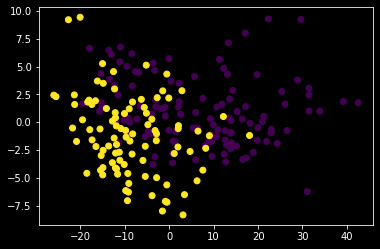

In [6]:
plt.style.use('dark_background')

plt.scatter(
    x=Z[:, 0],
    y=Z[:, 1],
    c=y
)

Since there are no visually apparent groups forming, more data will be required to perform accurate classification.

### 4.3 PART B

Check the contribution of the first 10 principal components.

In [7]:
# calculate total variance of first 10 principal components
v_pc = 0
for column in Z.T:
    v_pc = v_pc + np.var(column)

# calculate variance of entire dataset
v_dataset = 0
for column in X.T:
    v_dataset = v_dataset + np.var(column)

contribution_pc = 100 * v_pc / v_dataset

print(f"The first 10 principal components can describe {contribution_pc:.2f}% of the information in the dataset.")

The first 10 principal components can describe 97.22% of the information in the dataset.


## 5 ANN Classifier

### 5.1 Split the dataset into training and test sets

In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(Z, y, test_size=0.2, random_state=0)

### 5.2 Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

### 5.3 PART C

Build the ANN cancer model.

In [10]:
cancer_model = tf.keras.models.Sequential()
cancer_model.add(tf.keras.layers.Dense(10, activation='relu'))
cancer_model.add(tf.keras.layers.Dense(5, activation='relu'))
cancer_model.add(tf.keras.layers.Dense(3, activation='softmax'))
cancer_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cancer_model.fit(train_X, train_y, batch_size=8, epochs=100)

2021-11-09 13:29:41.185966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-09 13:29:41.186439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-09 13:29:41.186518: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-09 13:29:41.186578: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-09 13:29:41.186634: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/100
22/22 [==============================] - 0s 1ms/step - loss: 0.9524 - accuracy: 0.4767
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.8852 - accuracy: 0.5349
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.8266 - accuracy: 0.5698
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7725 - accuracy: 0.6221
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7234 - accuracy: 0.6337
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.6686

Evaluate the cancer model's accuracy.

In [11]:
cancer_model.evaluate(test_X, test_y)

2/2 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9535


[0.10427892208099365, 0.9534883499145508]